## 1er Parcial - Simulación Computacional 2020-I

# **Librerias a usar con algunos metodos**


In [ ]:
!pip install simpy

In [ ]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
import random
import matplotlib.pyplot as plt
import math
from scipy import stats

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def showValues(I,U):
    print("i\tUi")
    for t in range(0, len(U)):
        print("%d\t%2.4f" % (I[t],U[t]), sep=' ', end='\n')

def tamanoCiclo(values):
    tam = 1
    max_len = int(len(values) / 2)
    for ii in range(2, max_len):
        if (values[0:ii] == values[ii:2*ii]).any() :
            return ii
    return tam


def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<P[t2]:
                V.append(X[t2])
                break
    return V

def genpoisson(U,L):
    i=0
    px=np.exp(-L)
    Fx=px

    while True:
      if U < Fx:
        Xi = i
        return Xi
        break
      px = (L*px)/(i+1)
      Fx = Fx + px
      i = i + 1

def genpoissonN(Ui,L,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genpoisson(Ui[i],L)
      X.append(xi)
  return X

def genbinomial(U,n,p):
  c=p/(1-p)
  i=0
  px=np.power(1-p,n)
  Fx=px

  while True:
    if U < Fx:
      Xi = i
      return Xi
      break
    px=(c*(n-i)/(i+1))*px 
    Fx = Fx + px
    i = i + 1

def genbinomialN(Ui,n,p,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genbinomial(Ui[i],n,p)
      X.append(xi)
  return X

def CycleSize(P):
  flag = True
  print(P)
  acum=0
  const=P[1]-P[0]
  for t in range(1, len(P)):
    acum=acum+(P[t]-P[t-1])
    if const != (P[t]-P[t-1]):
      flag = False
      break

  #La verdad para mí sólo es hacer una resta estilo P[1] - P[0] mientras haya ciclo, pero en caso de que no existe es el for
  average = acum/(len(P)-1)
  if flag == True:
    print('El tamaño del ciclo es: ')
    print(average)
  else:
    print('No es posible encontrar un ciclo \n')

## 1.  (1.0 punto)
Para los siguientes generadores congruenciales mixtos encuentre $u_1,...,u_{100}$ y el tamaño del ciclo (si lo tiene)

**a)** $x_0=93, x_n = (14x_{n-1}+9) \mod 127$


In [ ]:
N = 100

a = 14.0
b = 9.0
m = 127.0
x0 = 93.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

**b)** $x_0=123, x_n = (191x_{n-1}) \mod 3173$

In [ ]:
N = 100

a = 191.0
b = 0.0
m = 3173.0
x0 = 123.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

**c)** $x_0=7, x_n = (5x_{n-1}+3) \mod 33$

In [ ]:
N = 100

a = 5.0
b = 3.0
m = 33.0
x0 = 7.0

[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

## 2.  (1.0 punto)
Calcule el estadístico $\chi^2$ para los siguientes generadores congruenciales mixtos a partir de la generación de $1000$ los valores pseudoaleatorios uniformes de $U(0,1)$: $u_1,...,u_{1000}$, para un $k=101$.

**a)** $x_0=1791, x_n = (65539x_{n-1}) \mod {2^{31}}$



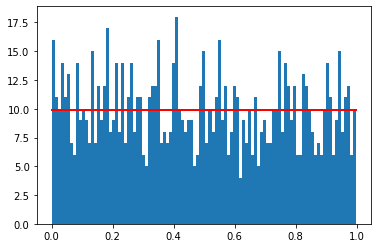

Estadístico chi2 = 97.66799999999996
97.668


In [ ]:
N = 1000

a = 65539.0
b = 0.0
m = math.pow(2, 31)
x0 = 1791.0

[I,X,U] = genranN(a,b,m,x0,N)

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**b)** $x_0=6773, x_n = (75x_{n-1}) \mod {2^{16} + 1}$

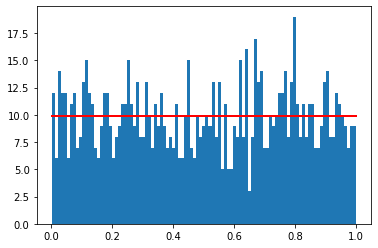

Estadístico chi2 = 87.56800000000001
87.568


In [ ]:
N = 1000

a = 75.0
b = 0.0
m = math.pow(2, 16)+1
x0 = 6773.0

[I,X,U] = genranN(a,b,m,x0,N)

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

**c)** $x_0=179, x_n = (5x_{n-1}+7) \mod 200$

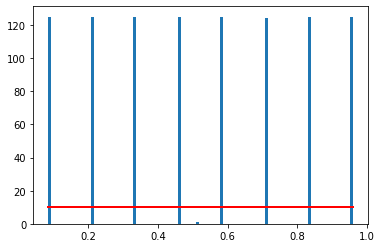

Estadístico chi2 = 11599.951999999974
11599.952000000001


In [ ]:
N = 1000

a = 5.0
b = 7.0
m = 200
x0 = 179.0

[I,X,U] = genranN(a,b,m,x0,N)

k=101
count, bins, ignored = plt.hist(U, k)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

## 3.  (1.0 punto)
Implemente un sistema de cola simple de clientes atendidos por un cajero de un banco, similar al ejemplo de simulación Ad Hoc del Taller 0 o el punto 10 del Taller 1, generando las variables aleatorias discretas tanto del número de minutos entre las llegadas de un cliente y otro al banco ($X$), así como del numero de minutos que le toma al cajero atender un cliente ($Y$) para un total de **200 clientes**, donde: <br><br>
$X$ es una distribución de Poisson con $\lambda = 10$<br>
$Y$ es una distribución de probabilidad discreta así:<br>
$Y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]$<br>
$p(Y) = [0.01, 0.02, 0.02, 0.02, 0.02, 0.025, 0.03, 0.05, 0.08, 0.09, 0.11, 0.15, 0.2, 0.125, 0.05]$<br><br>

Calcular:<br>
**a)** Tiempo promedio en el sistema<br>
**b)** Porcentaje de tiempo libre del servidor<br>
**c)** Promedio de tiempo de espera por cliente<br>
**d)** Fracción de clientes que estuvieron esperando<br>
**e)** Promedio de tiempo de espera de los clientes que esperaron en cola<br>

In [232]:
N = 200
L = 10

a = 34534.0
b = 7.0
m = (2**44)
x0 = int(round(time.time()*1000))

[IIi,XXi,Ui] = genranN(a,b,m,x0,N)
Pi = genpoissonN(Ui,L,N)
Ki = np.unique(Pi)
Ki = np.array(Ki)
X = Pi

x0 = int(round(time.time() * 1000))
[Iy,Xy,Uy] = genranN(a,b,m,x0,N)

Y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
p=[0.01,0.02,0.02,0.02,0.02,0.025,0.03,0.05,0.08,0.09,0.11,0.15,0.2,0.125,0.05]
P = np.cumsum(p)

V = genvardiscret(Uy,Y,P)
Y=V

def Arraivals(Ti):
  Tllegada = 0
  Tin = []
  for t in range(0,len(Ti)):
    Tllegada = Tllegada + Ti[t]
    Tin.append(Tllegada)
  return Tin

Y = Arraivals(Y)
#print(Ti)

def FindMinorService(Service):
  MinorNumber = Service[0]
  index = 0
  for t in range(1,len(Service)):
    if Service[t] < MinorNumber :
      MinorNumber = Service[t]
      index = t
        
  return index

def FifoMethod(X,Y,serv):
  
  Out = []
  s = np.zeros(serv) 
  index = 0
  TimeInSystem = 0 
  IdleTime = 0 
  TimeInQueue = 0     
  CountQueue = 0
  Ttotal = 0
  while index != len(X):

    b = FindMinorService(s)
    if X[index] >= s[b]:  #Compara con el servidor que esté más desocupado
      Out.append(X[index]+Y[index])
      Ttotal = Ttotal + Out[index]
      TimeInSystem = TimeInSystem + (Out[index]-X[index])
      if s[b] == 0:
        IdleTime = X[index]
      else:
        IdleTime = IdleTime + (Out[index-1]-X[index])
      s[b] = X[index]+Y[index]
      index = index + 1
    else:  
      Out.append(Y[index]+s[b])
      Ttotal = Ttotal + Out[index]
      TimeInSystem = TimeInSystem + (Out[index]-X[index])
      CountQueue = CountQueue + 1
      TimeInQueue  =TimeInQueue + (s[b]-X[index])
      s[b] = Y[index]+s[b]
      index = index + 1
    
       
  return [Out,TimeInSystem,IdleTime,TimeInQueue,CountQueue,Ttotal]

def showValues(O,X,Y):
    print("i\tTiempo de llegada\tTiempo de servicio\tTiempos de salida\t")
    for t in range(0, len(O)):
        print("%d\t\t%d\t\t\t%d\t\t\t%d\t" % (t+1,X[t],Y[t],O[t]), sep=' ', end='\n')

serv = 1
[Out,TimeInSystem,IdleTime,TimeInQueue,CountQueue,Ttotal] = FifoMethod(X,Y,serv)
showValues(Out,X,Y)


print("\n")
print("Average time in system: %2.4f\t" % (TimeInSystem/N),sep=' ', end='\n')
print("Percent idle time: %2.4f\t" % ((IdleTime/Ttotal)*100),sep=' ', end='\n')
print("Average waiting time per customer: %2.4f\t" % (TimeInQueue/N),sep=' ', end='\n')
print("Frraction having to wait: %2.4f\t" % (CountQueue/N),sep=' ', end='\n')
print("Average waiting time of those who waited: %2.4f\t" % (TimeInQueue/CountQueue),sep=' ', end='\n')


i	Tiempo de llegada	Tiempo de servicio	Tiempos de salida	
1		10			12			22	
2		8			21			43	
3		6			34			77	
4		13			48			125	
5		7			56			181	
6		7			71			252	
7		5			82			334	
8		12			96			430	
9		10			108			538	
10		11			122			660	
11		9			136			796	
12		7			145			941	
13		8			160			1101	
14		6			171			1272	
15		10			172			1444	
16		10			184			1628	
17		9			188			1816	
18		11			202			2018	
19		13			213			2231	
20		7			216			2447	
21		16			218			2665	
22		7			227			2892	
23		18			240			3132	
24		8			252			3384	
25		12			265			3649	
26		7			278			3927	
27		14			288			4215	
28		10			300			4515	
29		11			309			4824	
30		8			323			5147	
31		12			327			5474	
32		9			330			5804	
33		14			338			6142	
34		11			345			6487	
35		6			358			6845	
36		11			368			7213	
37		6			381			7594	
38		9			393			7987	
39		6			402			8389	
40		14			416			8805	
41		9			425			9230	
42		12			438			9668	
43		7			447			10115	
44		9			460			10575	
45		7			475			11050	
46		11			484			11534	
47		14			493			12027	
48		7	

## 4.  (1.0 punto)
Tomando como base la implementación de un sistema de linea de espera con un servidor (<a href="https://colab.research.google.com/drive/1Ff8QcrO8vFyNp3BGU7JHHk9mWH9NO8HL?usp=sharing">Notebook</a>), con las mismas semillas y generadores congruenciales, determine las medidas de desempeño si la variable aleatoria $Y$ correspondiente al tiempo de servicio se comporta como una distribución binomial con parámetros $n=20$ y $p=0.5$ 

In [ ]:
Xant1 = 434287492
Xant2 = 514324426

M = 99999.0
T = 40.0
at = []
an = []
LLt = []
St = []

In [ ]:
def gencongru1(): 
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
  U = gencongru2()
  n=20
  p=0.5
  c=p/(1-p)
  i=0
  px=np.power(1-p,n)
  Fx=px

  while True:
    if U < Fx:
      Xi = i
      return Xi
      break
    px=(c*(n-i)/(i+1))*px 
    Fx = Fx + px
    i = i + 1

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 

In [ ]:
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

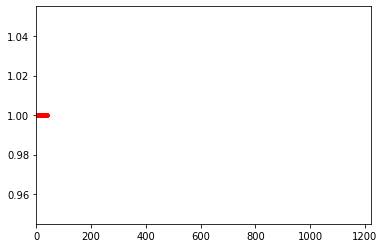

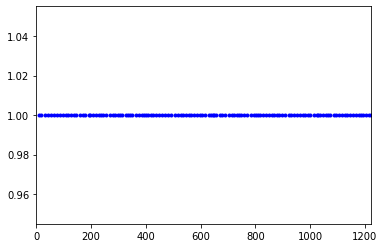

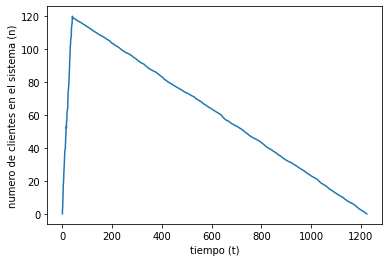

Tiempo medio de los clientes en el sistema:  593.8940319607556
Tiempo medio de los clientes en la cola:  584.007853098967
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  1184.047673493411
Número máximo de clientes en el sistema:  120
Total de clientes que pasaron por el sistema:  123


In [ ]:
at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)

## 5.  (1.0 punto)
Usando el ejemplo de SimPy de abajo de una conferencia que incluye buffet (refrigerio) con un tiempo máximo de simulación de 4 horas (i.e. 240 minutos) modifique el código para:

**a)** Implementar las medidas de desempeño de hambre promedio y conocimiento promedio.<br>
**b)** Comparar y analizar los siguientes escenarios a partir de las medidas de desempeño implementadas indicando cual escenario es mejor:

> 1. Duración de la charla 15 minutos, 4 charlas por sesión, 15 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 2. Duración de la charla 20 minutos, 4 charlas por sesión, 10 minutos de break, 2 puestos de buffet y 3 minutos por turno para comer en el buffet
> 3. Duración de la charla 15 minutos, 4 charlas por sesión, 20 minutos de break, 1 puestos de buffet y 3 minutos por turno para comer en el buffet

**c)** Implemente una configuración que garantice que el conocimiento promedio adquirido por los asistentes sea mayor de 3 y el hambre promedio sea menor a 2.

In [ ]:
!pip install simpy
import simpy

In [ ]:
from random import randint
import simpy 

In [ ]:
TALKS_PER_SESSION = 3
TALK_LENGTH = 30
BREAK_LENGTH = 15
DURATION_EAT = 3
BUFFET_SLOTS = 2

In [ ]:
Hambre = []
Conocimiento = []
def attendee(env, name, buffet, knowledge=0, hunger=0):
  global Hambre
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      hunger = hunger + randint(1, 4)
      yield env.timeout(TALK_LENGTH)
    
    Hambre.append(hunger)
    Conocimiento.append(knowledge)
    print('El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (name, knowledge, hunger))

    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        print('El asistente %s no llegó al buffet :( , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [ ]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

def promedio(H):
  acum=0
  for n in range(len(H)):
    acum = acum+H[n]
  return acum/(len(H))

hambreTengo = promedio(Hambre)
conocimientoProm = promedio(Conocimiento)

print("Hambre promedio: ",hambreTengo)
print("Conocimiento promedio: ",conocimientoProm)

** texto en cursivaPUNTO B**

In [ ]:
TALKS_PER_SESSION = 4
TALK_LENGTH = 15
BREAK_LENGTH = 15
DURATION_EAT = 3
BUFFET_SLOTS = 2

Hambre = []
Conocimiento = []

env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

hambreTengo1 = promedio(Hambre)
conocimientoProm1 = promedio(Conocimiento)



El asistente 0 terminó las charlas con un conocimiento 4.35 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 0.00 y hambre 10.00.
El asistente 2 terminó las charlas con un conocimiento 4.00 y hambre 8.00.
El asistente 3 terminó las charlas con un conocimiento 3.17 y hambre 11.00.
El asistente 4 terminó las charlas con un conocimiento 1.08 y hambre 10.00.
El asistente 0 terminó de comer con hambre 5.00
El asistente 1 terminó de comer con hambre 4.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 2.00
El asistente 0 terminó las charlas con un conocimiento 5.01 y hambre 18.00.
El asistente 1 terminó las charlas con un conocimiento 0.33 y hambre 14.00.
El asistente 2 terminó las charlas con un conocimiento 7.28 y hambre 9.00.
El asistente 3 terminó las charlas con un conocimiento 5.12 y hambre 11.00.
El asistente 4 terminó las charlas con un conocimiento 2.71 y hambre 14.00.
El

In [ ]:
TALKS_PER_SESSION = 4
TALK_LENGTH = 20
BREAK_LENGTH = 10
DURATION_EAT = 3
BUFFET_SLOTS = 2

Hambre = []
Conocimiento = []

env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

hambreTengo2 = promedio(Hambre)
conocimientoProm2 = promedio(Conocimiento)


El asistente 0 terminó las charlas con un conocimiento 3.81 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 1.12 y hambre 9.00.
El asistente 2 terminó las charlas con un conocimiento 3.12 y hambre 8.00.
El asistente 3 terminó las charlas con un conocimiento 1.42 y hambre 11.00.
El asistente 4 terminó las charlas con un conocimiento 2.43 y hambre 9.00.
El asistente 0 terminó de comer con hambre 1.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 1.00
El asistente 3 terminó de comer con hambre 4.00
El asistente 4 terminó de comer con hambre 5.00
El asistente 0 terminó las charlas con un conocimiento 6.94 y hambre 10.00.
El asistente 1 terminó las charlas con un conocimiento 1.53 y hambre 14.00.
El asistente 2 terminó las charlas con un conocimiento 5.07 y hambre 13.00.
El asistente 3 terminó las charlas con un conocimiento 1.50 y hambre 14.00.
El asistente 4 terminó las charlas con un conocimiento 2.67 y hambre 16.00.
El 

In [ ]:
TALKS_PER_SESSION = 4
TALK_LENGTH = 15
BREAK_LENGTH = 20
DURATION_EAT = 3
BUFFET_SLOTS = 1

Hambre = []
Conocimiento = []

env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

hambreTengo3 = promedio(Hambre)
conocimientoProm3 = promedio(Conocimiento)
Division1 = hambreTengo1/conocimientoProm1
Division2 = hambreTengo2/conocimientoProm2
Division3 = hambreTengo3/conocimientoProm3
print("Simulacion N \t Hambre \t Conocimiento\t Hambres respecto conocimiento")
print("\t%d\t%2.4f\t\t%2.4f\t\t%2.4f" % (1,hambreTengo1,conocimientoProm1, Division1), sep=' ', end='\n')
print("\t%d\t%2.4f\t\t%2.4f\t\t%2.4f" % (2,hambreTengo2,conocimientoProm2, Division2), sep=' ', end='\n')
print("\t%d\t%2.4f\t\t%2.4f\t\t%2.4f" % (3,hambreTengo2,conocimientoProm3, Division3), sep=' ', end='\n')

print("En la mayoria de los casos, la mejor escenario es el de la simulacion 1")

El asistente 0 terminó las charlas con un conocimiento 0.75 y hambre 8.00.
El asistente 1 terminó las charlas con un conocimiento 2.00 y hambre 7.00.
El asistente 2 terminó las charlas con un conocimiento 0.11 y hambre 12.00.
El asistente 3 terminó las charlas con un conocimiento 0.65 y hambre 10.00.
El asistente 4 terminó las charlas con un conocimiento 4.13 y hambre 10.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 3.00
El asistente 2 terminó de comer con hambre 6.00
El asistente 3 terminó de comer con hambre 3.00
El asistente 4 terminó de comer con hambre 7.00
El asistente 0 terminó las charlas con un conocimiento 4.83 y hambre 6.00.
El asistente 1 terminó las charlas con un conocimiento 2.52 y hambre 16.00.
El asistente 2 terminó las charlas con un conocimiento 0.86 y hambre 14.00.
El asistente 3 terminó las charlas con un conocimiento 1.90 y hambre 8.00.
El asistente 4 terminó las charlas con un conocimiento 4.73 y hambre 15.00.
El a

**Punto C**

In [ ]:
TALKS_PER_SESSION = 1
TALK_LENGTH = 1
BREAK_LENGTH = 10
DURATION_EAT = 10
BUFFET_SLOTS = 5

Hambre = []
Conocimiento = []

env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(5):
  env.process(attendee(env, i, buffet))
env.run(until=220)

hambreTengo = promedio(Hambre)
conocimientoProm = promedio(Conocimiento)

print("Hambre promedio: ",hambreTengo)
print("Conocimiento promedio: ",conocimientoProm)

print("Por más que he cambiado la configuración, no he logrado hacer el hambre menor a 2")

El asistente 0 terminó las charlas con un conocimiento 3.00 y hambre 4.00.
El asistente 1 terminó las charlas con un conocimiento 1.00 y hambre 3.00.
El asistente 2 terminó las charlas con un conocimiento 1.00 y hambre 1.00.
El asistente 3 terminó las charlas con un conocimiento 2.00 y hambre 3.00.
El asistente 4 terminó las charlas con un conocimiento 2.00 y hambre 1.00.
El asistente 0 terminó de comer con hambre 0.00
El asistente 1 terminó de comer con hambre 0.00
El asistente 2 terminó de comer con hambre 0.00
El asistente 3 terminó de comer con hambre 0.00
El asistente 4 terminó de comer con hambre 0.00
El asistente 0 terminó las charlas con un conocimiento 6.00 y hambre 1.00.
El asistente 1 terminó las charlas con un conocimiento 2.00 y hambre 4.00.
El asistente 2 terminó las charlas con un conocimiento 1.00 y hambre 3.00.
El asistente 3 terminó las charlas con un conocimiento 2.00 y hambre 3.00.
El asistente 4 terminó las charlas con un conocimiento 4.00 y hambre 3.00.
El asisten